In [35]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import cv2
import os
from os.path import isfile, join

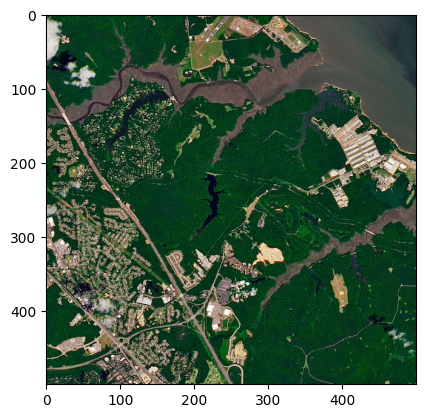

In [51]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
def cut_image(img,x,y,t1,t2):
    return img[x:t1+x,y:t2+y,:]
img=plt.imread("./tp3.jpg")
img=cut_image(img,0,0,500,500)
plt.imshow(img)
gray_img=rgb2gray(img)

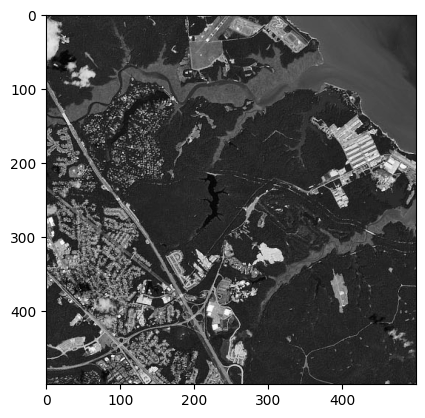

In [47]:
plt.imshow(gray_img,cmap="gray")

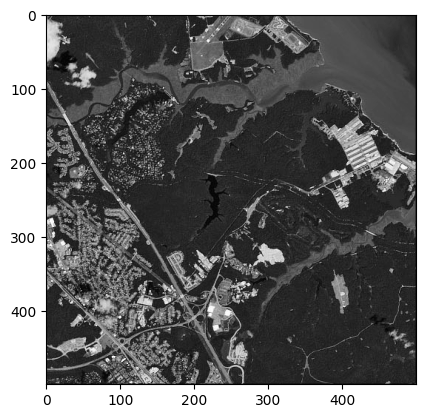

In [70]:
def gauss(x,y,sigma=0.01):
    return (((1)/(2*np.pi*sigma**2))*(np.exp(-(x**2+y**2)/(2*sigma**2))))


def gauss_filter(shape=(3,3)):
    a=np.ones(shape)

    for x in range(a.shape[0]):
        for y in range(a.shape[1]):
   
            a[x][y]=gauss(x,y,0.1)
    return a


def filter_img(img):
    n=img.shape[0]
    m=img.shape[1]
    a=img.copy()
    filter=gauss_filter()

    for x in range(1,n-1):
        for y in range(1,m-1):
            
            a[x][y]=np.round(np.mean(np.multiply(img[x-1:x+2,y-1:y+2],filter)))
       
    return a
gray_filterd_img=filter_img(gray_img)
plt.imshow(gray_filterd_img,cmap="gray")

<h2>First Order Filters:</h2>

<h4>Robert Filter</h4>

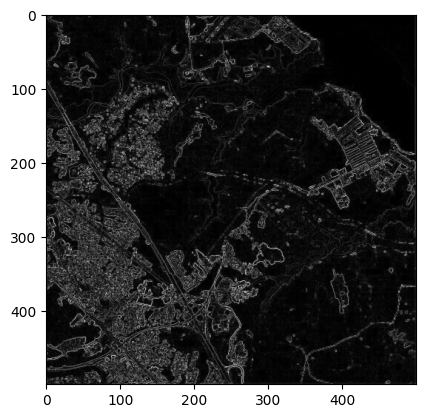

In [73]:
#function to convole the image with a filter
def convolve(img,filter):
    x_filter=filter.shape[0]
    y_filter=filter.shape[0]
    cp=img.copy()
    n=img.shape[0]
    m=img.shape[1]
    for x in range(x_filter%2,n-(x_filter//2)):
        for y in range(y_filter%2,m-(y_filter//2)):
        
           
            tmp=np.sum((img[x-x_filter%2:(x+x_filter//2)+1,y-y_filter%2:y+(y_filter//2)+1])*filter)
            if(tmp>255):

                cp[x][y]=255
            else:
                cp[x][y]=tmp


    return cp

def amplitude(gx,gy):
    return np.sqrt(gx**2+gy**2) 
def angle(gx,gy):
    return np.arctan2(-gx,gy)

gx_filter=np.array([[1,0],[0,-1]])
gy_filter=np.array([[0,1],[-1,0]])
laplacien_filter=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
g=convolve(gray_filterd_img,laplacien_filter)

gx=convolve(gray_filterd_img,gx_filter)
gy=convolve(gray_filterd_img,gy_filter)


G=amplitude(gx,gy)
O=angle(gx,gy)

plt.imshow(G,cmap="gray")

In [76]:
def seuillage(img,seuil=120):
    cp=img.copy()
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if(img[x][y]>=seuil):
                cp[x][y]=255
            else:
                cp[x][y]=0
    return cp

s=seuillage(g)
                    
    

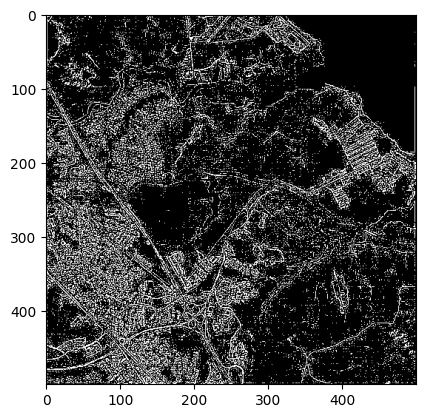

In [77]:
plt.imshow(s,cmap="gray")


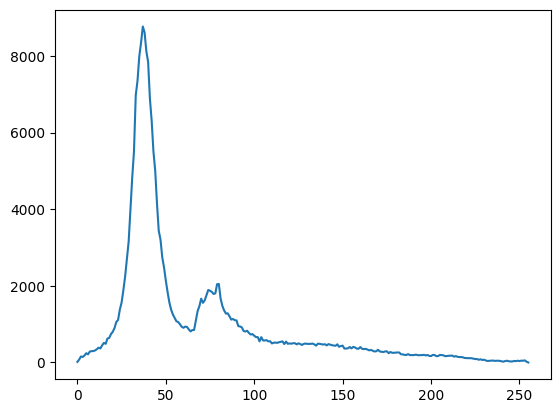

In [96]:
histogram, bin_edges = np.histogram(gray_img, bins=256, range=(0, 256))
plt.plot(bin_edges[0:-1], histogram)


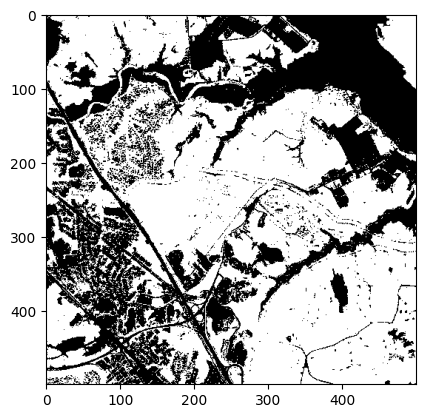

In [90]:
def segmentation(img,thresh_down,thresh_up):
    cp=img.copy()
    for x in range(cp.shape[0]):
        for y in range(cp.shape[1]):
            if(cp[x][y]<thresh_up and cp[x][y]>thresh_down):
                cp[x][y]=255
            else:
                cp[x][y]=0
    return cp

segmented_image1=segmentation(gray_img,0,60)
segmented_image2=segmentation(gray_img,60,100)
segmented_image3=segmentation(gray_img,100,255)
plt.imshow(segmented_image1,cmap="gray") 

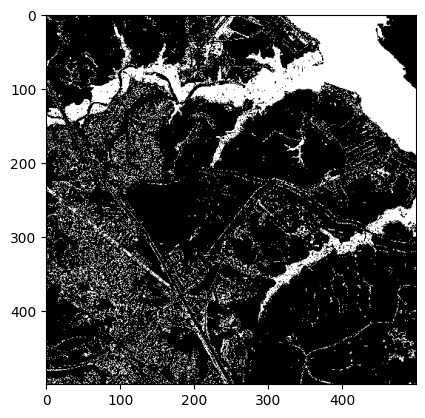

In [89]:
plt.imshow(segmented_image2,cmap="gray")   

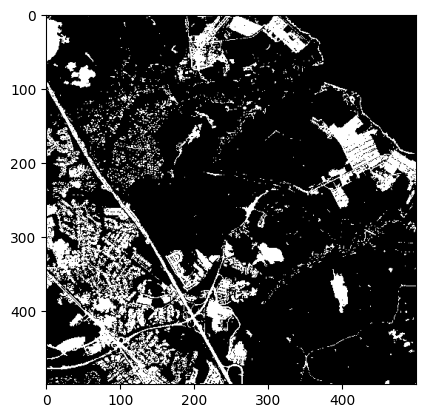

In [91]:
plt.imshow(segmented_image3,cmap="gray")   

<h3>Otsu’s method</h3>

In [137]:
def pixel_number1(h,thresh):
    return np.sum([h[i] for i in range(0,thresh)])

def mean1(h,thresh):
     return (1/pixel_number1(h,thresh))*np.sum([h[i]*i for i in range(0,thresh)])


def variance1(h,thresh):
    return (1/pixel_number1(h,thresh))*np.sum([np.square(i-mean1(h,thresh))*h[i] for i in range(0,thresh)])



def pixel_number2(h,thresh):
    return np.sum([h[i] for i in range(thresh,256)])

def mean2(h,thresh):
     return (1/pixel_number2(h,thresh))*np.sum([h[i]*i for i in range(thresh,256)])


def variance2(h,thresh):
    return (1/pixel_number2(h,thresh))*np.sum([np.square(i-mean2(h,thresh))*h[i] for i in range(thresh,256)])




arr=[]

for i in range(1,256):
    temp=pixel_number1(histogram,i)*variance1(histogram,i)+pixel_number2(histogram,i)*variance2(histogram,i)
    arr.append(temp)
print(np.min(arr))    

nan


/tmp/ipykernel_31230/1305090919.py:21: RuntimeWarning: divide by zero encountered in long_scalars
  return (1/pixel_number2(h,thresh))*np.sum([np.square(i-mean2(h,thresh))*h[i] for i in range(thresh,256)])
/tmp/ipykernel_31230/1305090919.py:17: RuntimeWarning: divide by zero encountered in long_scalars
  return (1/pixel_number2(h,thresh))*np.sum([h[i]*i for i in range(thresh,256)])
/tmp/ipykernel_31230/1305090919.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return (1/pixel_number2(h,thresh))*np.sum([h[i]*i for i in range(thresh,256)])
